In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%notebook inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Reading file and checking head

In [4]:
df = pd.read_csv("StudentsPerformance.csv")

In [5]:
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The dataset contains multiple score columns so lets first encode the values using the label encoder and find the correlation 

In [6]:
for col in df.select_dtypes("object"):
    print(df[col].value_counts())
    print("\n")

female    518
male      482
Name: gender, dtype: int64


group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


standard        645
free/reduced    355
Name: lunch, dtype: int64


none         642
completed    358
Name: test preparation course, dtype: int64




In [7]:
df1 = df.copy()

enc = LabelEncoder()
dict_ls = [] # list for referencing class

for col in df1.select_dtypes("object"):
    df1[col] = enc.fit_transform(df1[col])
    col_dict = {index: val for index,val in enumerate(enc.classes_)}
    dict_ls.append(col_dict)

df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [8]:
for i in dict_ls:
    print(i)
    print("\n")

{0: 'female', 1: 'male'}


{0: 'group A', 1: 'group B', 2: 'group C', 3: 'group D', 4: 'group E'}


{0: "associate's degree", 1: "bachelor's degree", 2: 'high school', 3: "master's degree", 4: 'some college', 5: 'some high school'}


{0: 'free/reduced', 1: 'standard'}


{0: 'completed', 1: 'none'}




In [14]:
sns.set_style('darkgrid')

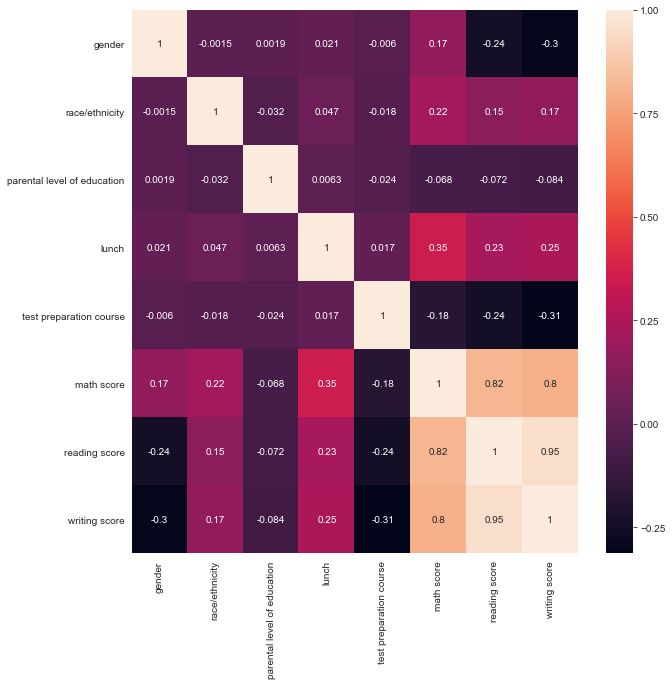

In [15]:
import seaborn as sns
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

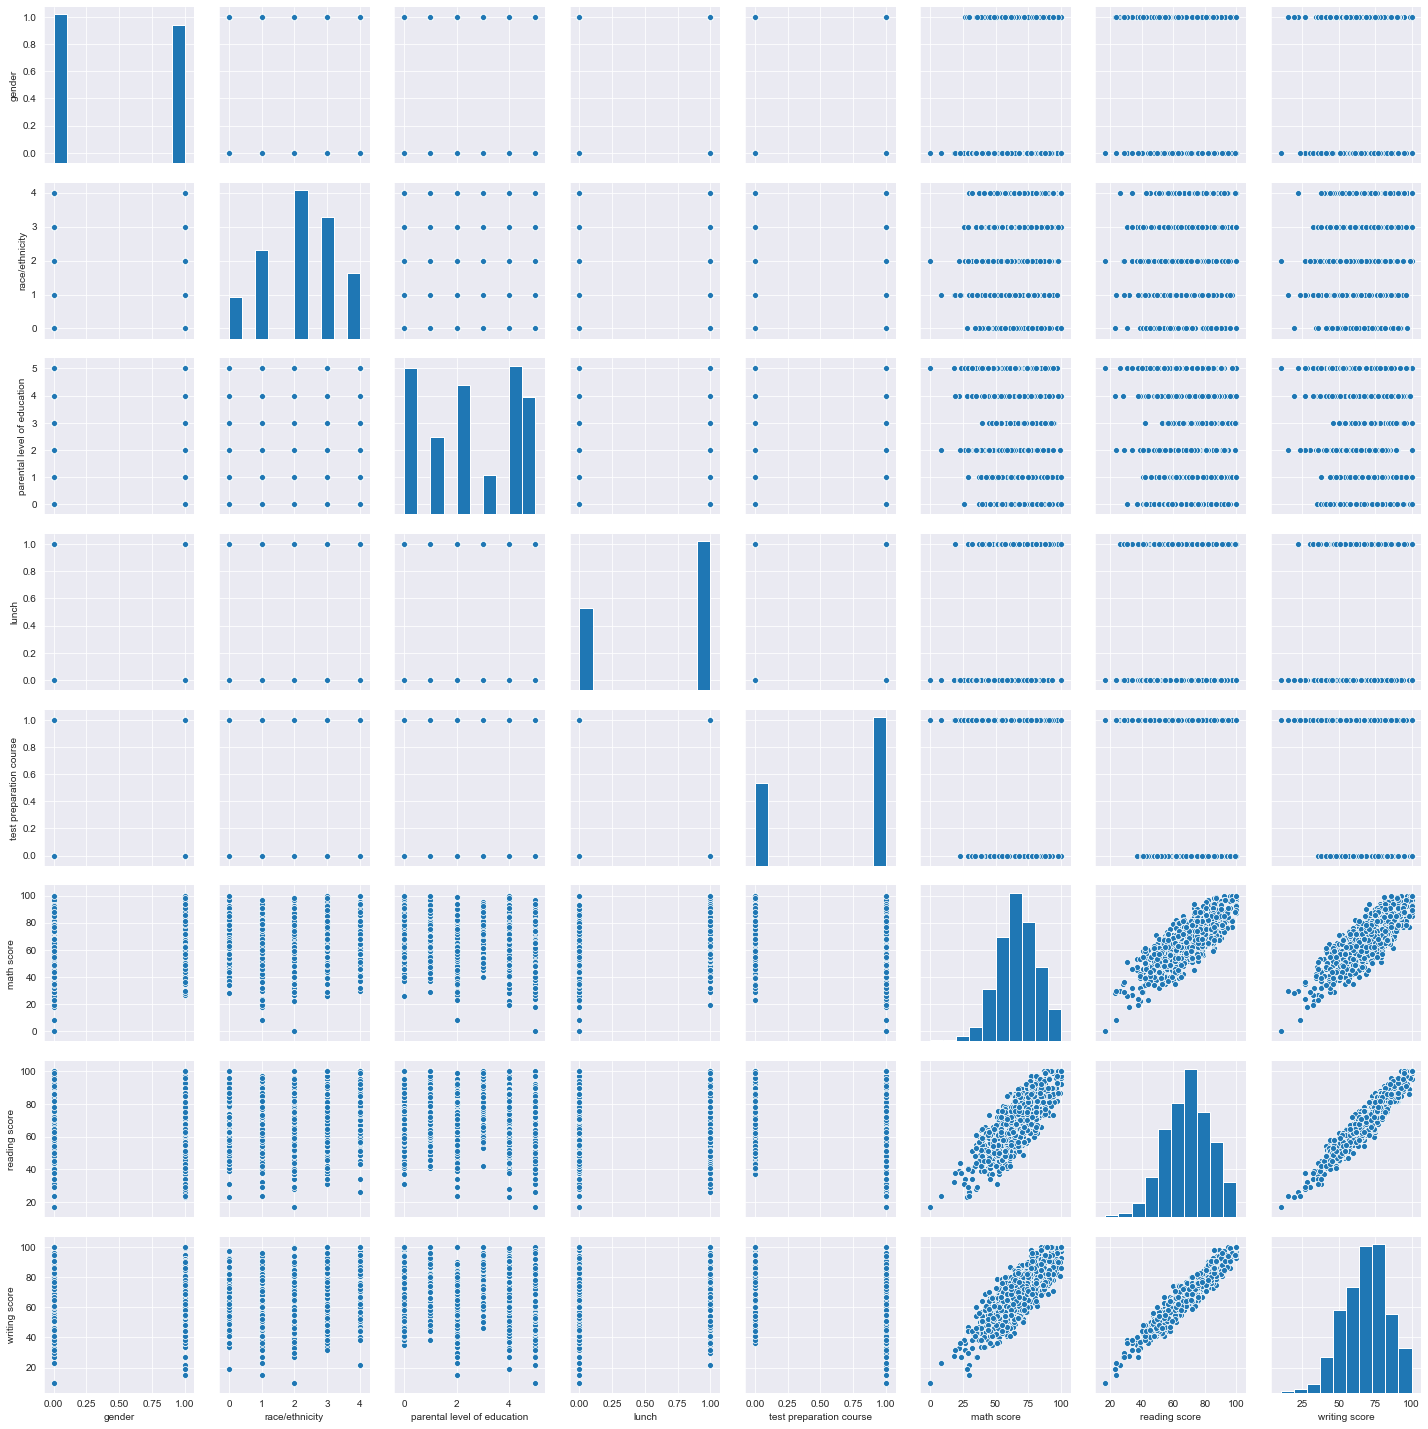

In [16]:
sns.pairplot(df1)

From the above heatmap we can see the scores are positively correlated to each other.

So, we can use 2 score cols to find the value of another. We can also use race and lunch cols

In [8]:
df2 = df1.copy()

df2.drop(["gender", "parental level of education", "test preparation course"], axis=1, inplace=True) # race and lunch cols with scores

# only scores
#df2.drop(df2.iloc[:,:5], axis=1, inplace=True) # before commenting out this comment the above line

df2.head()

,race/ethnicity,lunch,math score,reading score,writing score
0,1,1,72,72,74
1,2,1,69,90,88
2,1,1,90,95,93
3,0,0,47,57,44
4,2,1,76,78,75


Now we have to train our models 3 times as there are 3 cols whose value we wish to predict

In [9]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
}

In [10]:
def splitData(df, col):
    X = df.drop(col, axis =1)
    y = df[col]
    return X,y

X1, y1 = splitData(df2, "math score")
X2, y2 = splitData(df2, "reading score")
X3, y3 = splitData(df2, "writing score")

In [11]:
def tr_ts_split(X,y):
    
    sc = StandardScaler()

    X = pd.DataFrame(sc.fit_transform(X), columns=X1.columns)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
    
    return X_train, X_test, y_train, y_test

In [12]:
def trainModels(X_train, y_train):
    for name, model in models.items():
        model.fit(X_train, y_train)
        print(name + " trained.")

In [13]:
def testModels(X_test, y_test):
    for name, model in models.items():
        print(name + " Accuracy: {:.5f}".format(model.score(X_test, y_test)))
                     

models for math score

In [16]:
X_train, X_test, y_train, y_test = tr_ts_split(X1, y1)
trainModels(X_train, y_train)
print("\n")
testModels(X_test, y_test)

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.


                     Linear Regression Accuracy: 0.71182
 Linear Regression (L2 Regularization) Accuracy: 0.71185
 Linear Regression (L1 Regularization) Accuracy: 0.71854


models for reading score

In [17]:
X_train, X_test, y_train, y_test = tr_ts_split(X2, y2)
trainModels(X_train, y_train)
print("\n")
testModels(X_test, y_test)

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.


                     Linear Regression Accuracy: 0.91069
 Linear Regression (L2 Regularization) Accuracy: 0.91073
 Linear Regression (L1 Regularization) Accuracy: 0.90108


models for writing score

In [18]:
X_train, X_test, y_train, y_test = tr_ts_split(X3, y3)
trainModels(X_train, y_train)
print("\n")
testModels(X_test, y_test)

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.


                     Linear Regression Accuracy: 0.90120
 Linear Regression (L2 Regularization) Accuracy: 0.90125
 Linear Regression (L1 Regularization) Accuracy: 0.89632


We can also one hot encode race and lunch cols to see if it gives better results

In [19]:
df3 = df.copy()
df3.drop(["gender", "parental level of education", "test preparation course"], axis=1, inplace=True)
df3.head()

,race/ethnicity,lunch,math score,reading score,writing score
0,group B,standard,72,72,74
1,group C,standard,69,90,88
2,group B,standard,90,95,93
3,group A,free/reduced,47,57,44
4,group C,standard,76,78,75


In [20]:
def oneHotEncode(df, col):
    df = df.copy()
    dummies = pd.get_dummies(df[col])
    df = pd.concat([df, dummies], axis =1)
    df.drop(col, axis=1, inplace=True)
    return df

In [21]:
df3 = oneHotEncode(df3, "race/ethnicity")
df3 = oneHotEncode(df3, "lunch")

In [22]:
df3.head()

,math score,reading score,writing score,group A,group B,group C,group D,group E,free/reduced,standard
0,72,72,74,0,1,0,0,0,0,1
1,69,90,88,0,0,1,0,0,0,1
2,90,95,93,0,1,0,0,0,0,1
3,47,57,44,1,0,0,0,0,1,0
4,76,78,75,0,0,1,0,0,0,1


In [23]:
X1, y1 = splitData(df3, "math score")
X2, y2 = splitData(df3, "reading score")
X3, y3 = splitData(df3, "writing score")

math model

In [24]:
X_train, X_test, y_train, y_test = tr_ts_split(X1, y1)
trainModels(X_train, y_train)
print("\n")
testModels(X_test, y_test)

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.


                     Linear Regression Accuracy: 0.72096
 Linear Regression (L2 Regularization) Accuracy: 0.72092
 Linear Regression (L1 Regularization) Accuracy: 0.72292


reading model

In [25]:
X_train, X_test, y_train, y_test = tr_ts_split(X2, y2)
trainModels(X_train, y_train)
print("\n")
testModels(X_test, y_test)

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.


                     Linear Regression Accuracy: 0.91104
 Linear Regression (L2 Regularization) Accuracy: 0.91110
 Linear Regression (L1 Regularization) Accuracy: 0.90108


writing model

In [26]:
X_train, X_test, y_train, y_test = tr_ts_split(X3, y3)
trainModels(X_train, y_train)
print("\n")
testModels(X_test, y_test)

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.


                     Linear Regression Accuracy: 0.90143
 Linear Regression (L2 Regularization) Accuracy: 0.90147
 Linear Regression (L1 Regularization) Accuracy: 0.89632


Reading and writing scores can predict each other very well but are not so good for predicting math score